<div style="text-align: center; background-color: green;  padding: 5px; border-radius:10px"> 

## ${\textbf{Import Libraries}}$

 </div>

In [35]:
import numpy as np
import pandas as pd
import scipy.stats as stats

#These are the visualization libraries. Matplotlib is standard and is what most people use.
#Seaborn works on top of matplotlib, as we mentioned in the course.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler
#Hierarchical clustering with the Sci Py library. We'll use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram, linkage
#Sk learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# We need to save the models, which we'll use in the next section. We'll use pickle for that.
import pickle

<div style="text-align: center; background-color: green;  padding: 5px; border-radius:10px"> 

## ${\textbf{Load Data}}$
 </div>



In [4]:
# Load the data, contained in the segmentation data csv file.
df_segmentation = pd.read_csv('../data/segmentation data.csv', index_col = 0)



<div style="text-align: center; background-color: green;  padding: 5px; border-radius:10px"> 

## ${\textbf{Explore Data}}$
 </div>


In [6]:
# Descriptive analysis of the data set. Here we just look at the data to gain some insight. 
# We do not apply any transformations or changes to the data.
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [7]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


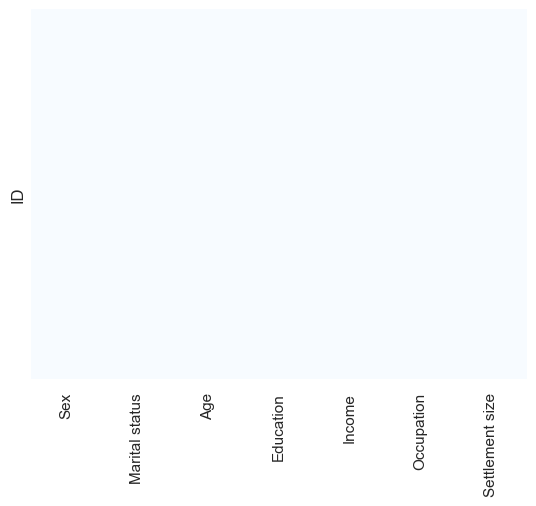

In [9]:
# Missing values?
sns.heatmap(df_segmentation.isnull(), yticklabels=False, cbar=False, cmap="Blues");

In [11]:
# Are there duplicated values?
df_segmentation.duplicated().sum()

0

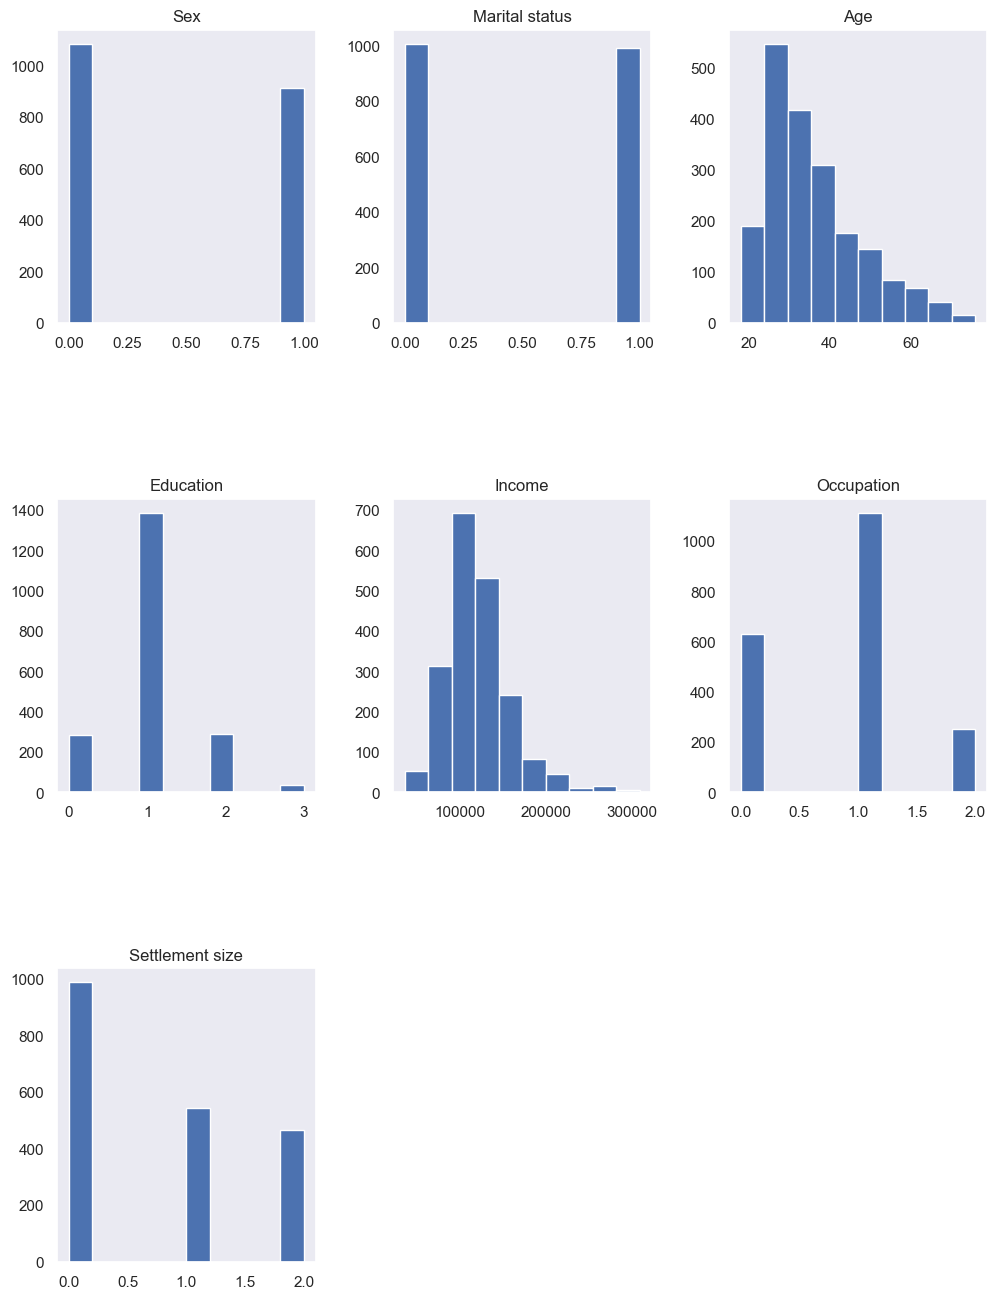

In [14]:
# plot histograms for all numeric columns
df_segmentation.hist(bins=10, figsize=(12,16), grid=False,layout=(len(df_segmentation.columns)//3+1, 3))
# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.6)

## Contraste de normalidad

* H0: La distribucion de la variable aleatoria **tiene** una distribución normal
* H1: La distribucion de la variable aleatoria **no tiene** una distribución normal

In [81]:
def diagmostic_shapiro(df,variable):
    # Histograma
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title(variable)
    sns.histplot(df[variable], kde=True)
    # Grafico QQ-plot
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist="norm",plot=plt)
    plt.title("Gráfico Q-Q")
    plt.show()
    # Contraste de normalidad para una determinada columna
    feature = df[variable]
    stat, p = stats.shapiro(feature)
    print(f"Estadístico de Shapiro: {stat:.4f}")
    print(f"P-valor: {p:.4f}")
    if p > 0.05:
        print("No se rechaza la hipótesis nula de igualdad de distribuciones")
    else:
        print("Se rechaza la hipótesis nula de igualdad de distribuciones")

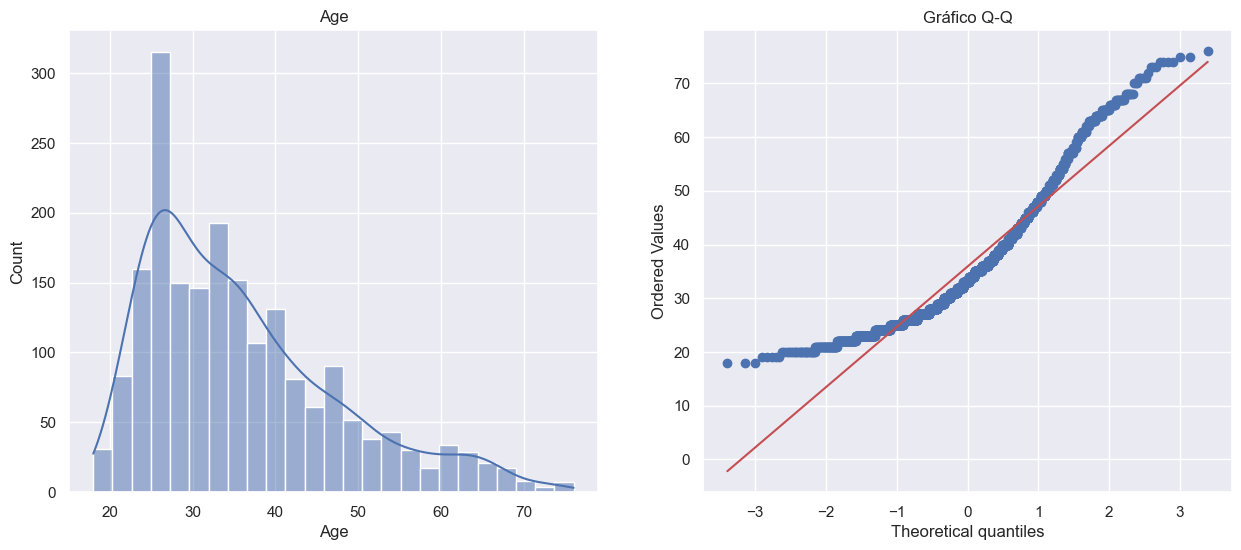

Estadístico de Shapiro: 0.9157
P-valor: 0.0000
Se rechaza la hipótesis nula de igualdad de distribuciones


In [82]:
diagmostic_shapiro(df_segmentation, 'Age') # using shapiro

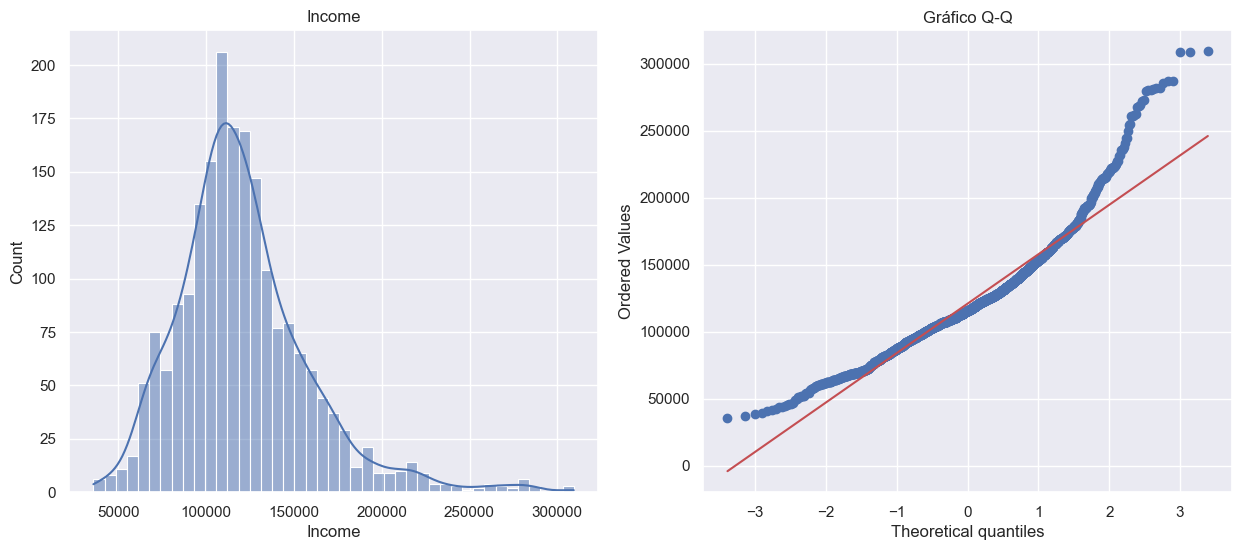

Estadístico de Shapiro: 0.9340
P-valor: 0.0000
Se rechaza la hipótesis nula de igualdad de distribuciones


In [83]:
diagmostic_shapiro(df_segmentation, 'Income')

In [84]:
def diagmostic_kolmogorov(df,variable):
    # Histograma
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title(variable)
    sns.histplot(df[variable], kde=True)
    # Grafico QQ-plot
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist="norm",plot=plt)
    plt.title("Gráfico Q-Q")
    plt.show()
    # Contraste de normalidad para una determinada columna
    feature = df[variable]
    # Usar 'norm' como distribución teórica y obtener el estadístico y el valor p
    stat = stats.kstest(feature, 'norm').statistic
    p = stats.kstest(feature, 'norm').pvalue
    print(f"Estadístico de Kolmogorov-Smirnov: {stat:.4f}")
    print(f"P-valor: {p:.4f}")
    # Usar un nivel de significancia de 0.05
    alpha = 0.05
    if p > alpha:
        print("No se rechaza la hipótesis nula de normalidad")
    else:
        print("Se rechaza la hipótesis nula de normalidad")


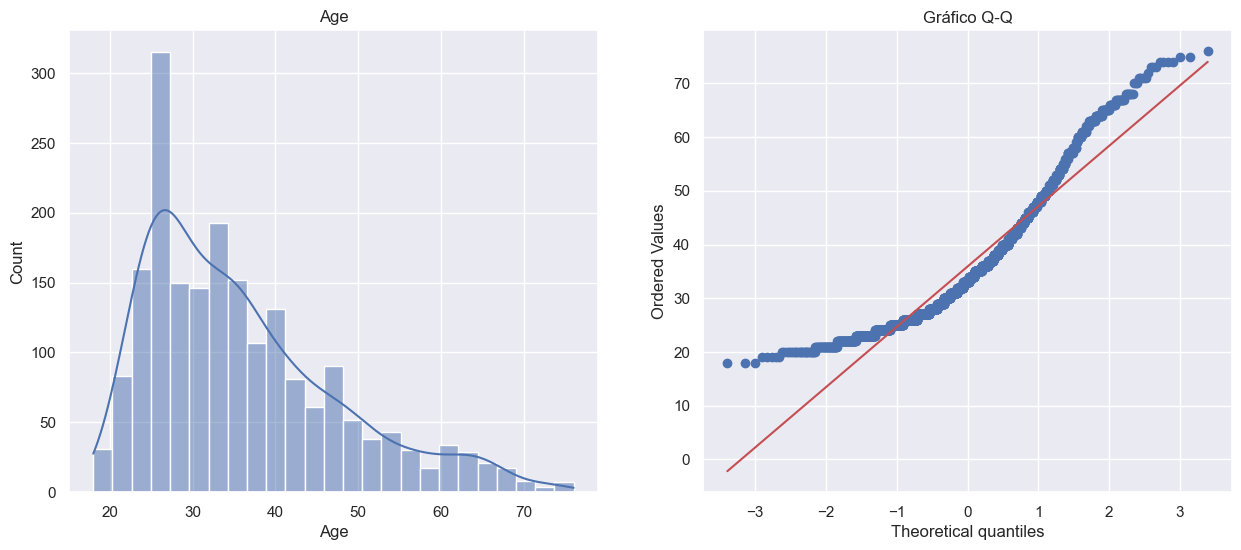

Estadístico de Kolmogorov-Smirnov: 1.0000
P-valor: 0.0000
Se rechaza la hipótesis nula de normalidad


In [85]:
diagmostic_kolmogorov(df_segmentation, 'Age')

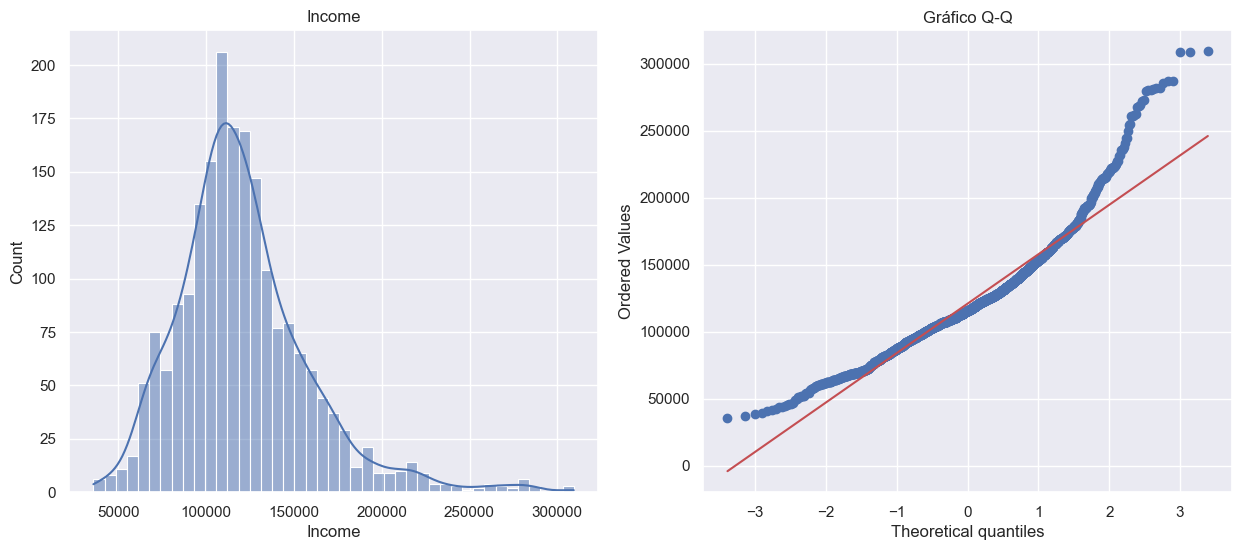

Estadístico de Kolmogorov-Smirnov: 1.0000
P-valor: 0.0000
Se rechaza la hipótesis nula de normalidad


In [86]:
diagmostic_kolmogorov(df_segmentation, 'Income')

### Transformations

In [89]:
df_segmentation["Income_transf_log"] = np.log(df_segmentation["Income"]) # transformacion log
#df_segmentation["age_transf_cub"] = np.cbrt(df_segmentation["Age"]) # cubica

#from scipy.stats import boxcox
#df_segmentation["Income_boxcox"] = boxcox(df_segmentation["Income"], 0.5)
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,age_transf_cub,Income_boxcox,Income_transf_log
ID,,,,,,,,,,
100000001,0,0,67,2,124670,1,2,4.061548,704.172783,11.733426
100000002,1,1,22,1,150773,1,2,2.802039,774.589982,11.923531
100000003,0,0,49,1,89210,0,0,3.659306,595.360862,11.398748
100000004,0,0,45,1,171565,1,1,3.556893,826.408112,12.052717
100000005,0,0,53,1,149031,1,1,3.756286,770.090668,11.911910


In [73]:
del df_segmentation["age_boxcox"]

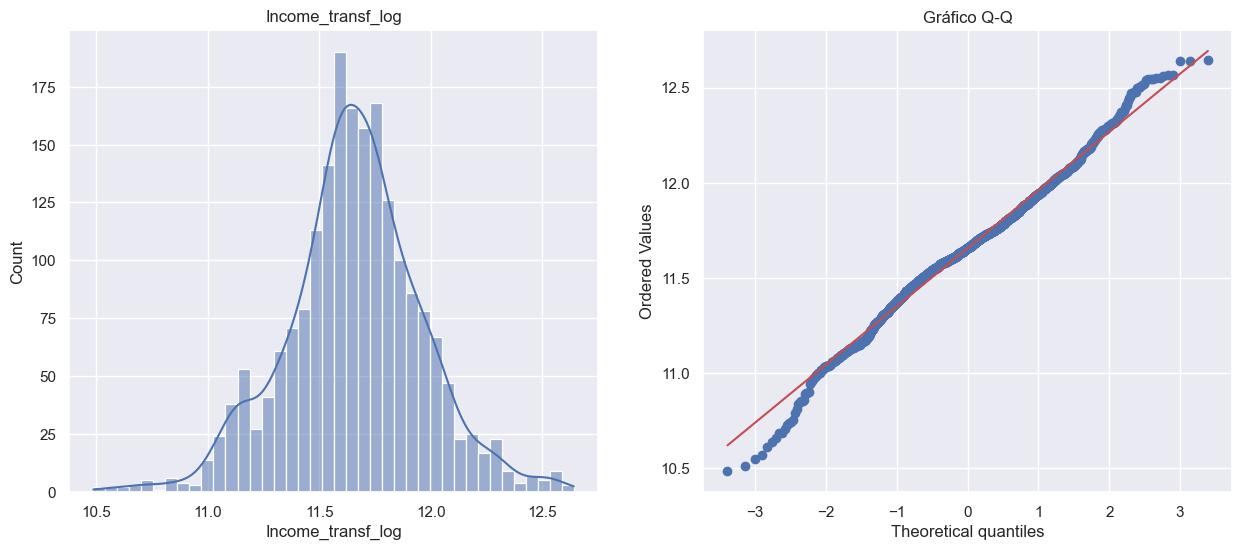

Estadístico de Kolmogorov-Smirnov: 1.0000
P-valor: 0.0000
Se rechaza la hipótesis nula de normalidad


In [91]:
diagmostic_kolmogorov(df_segmentation, 'Income_transf_log')

## Scaterplot

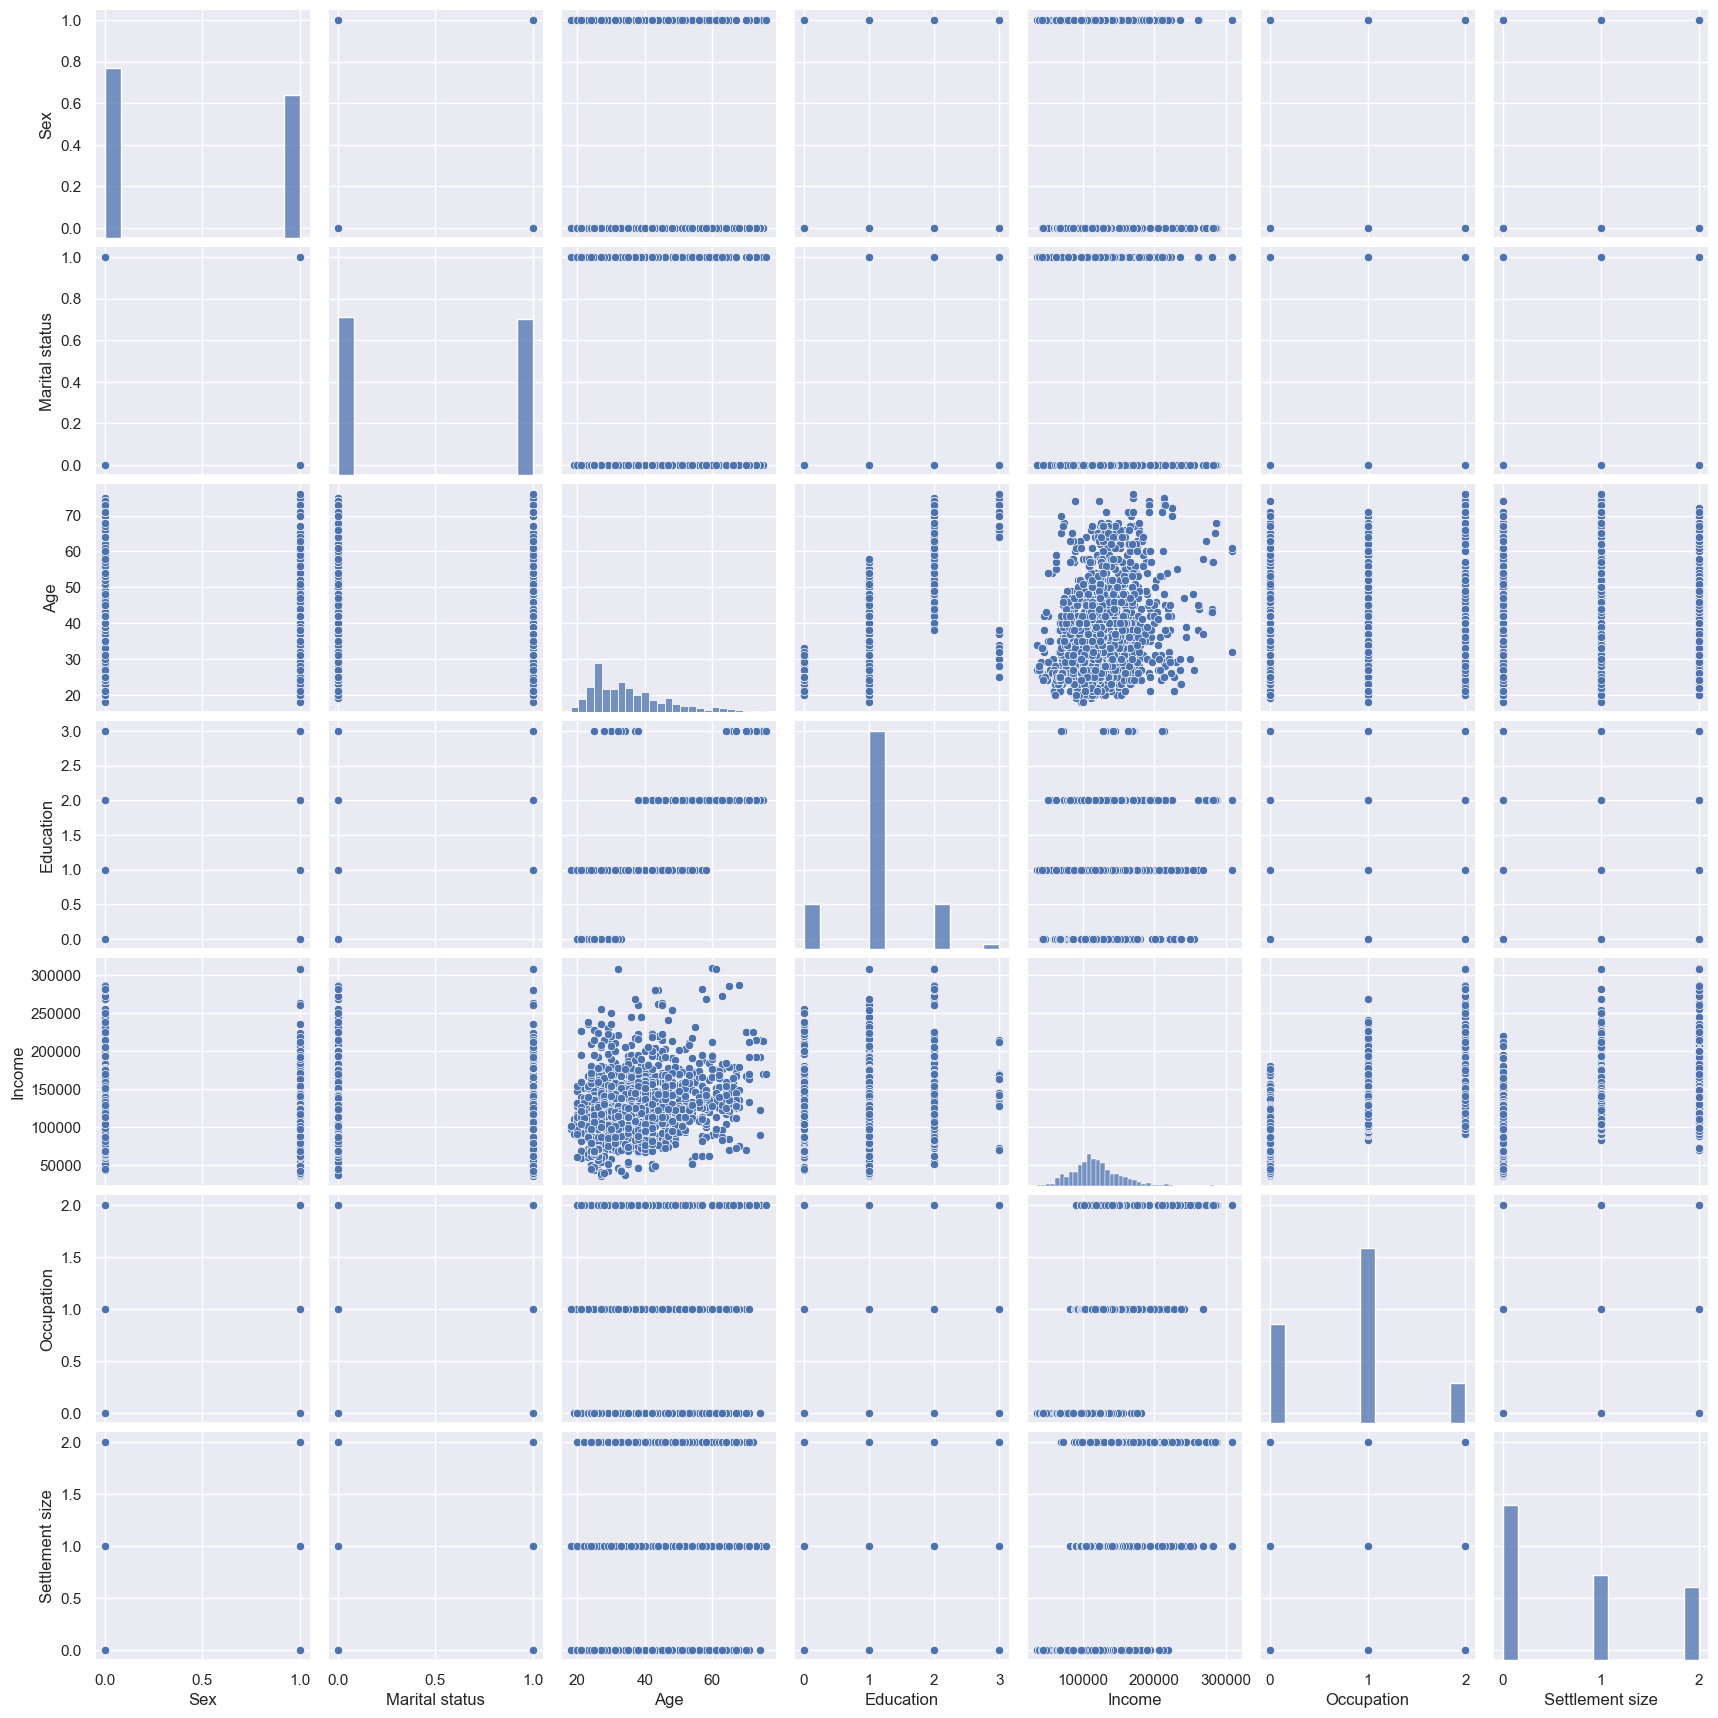

In [19]:
sns.pairplot(df_segmentation)

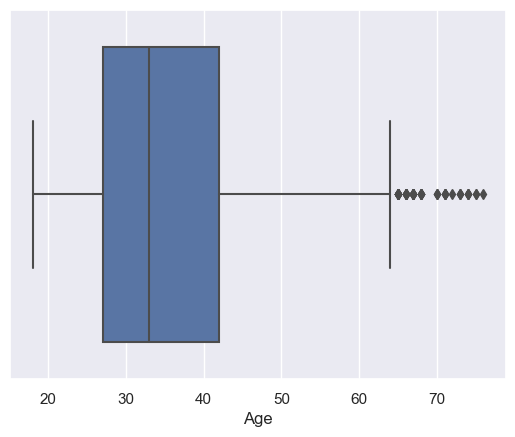

In [30]:
sns.boxplot(x=df_segmentation['Age']);

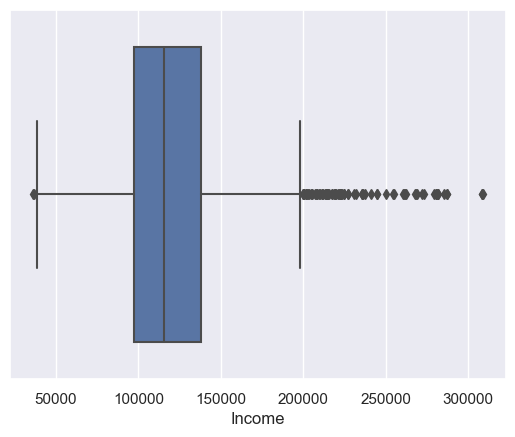

In [31]:
sns.boxplot(x=df_segmentation['Income']);

In [32]:
def replace_outliers_with_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].mask(df[col] < lower_bound, lower_bound)
    df[col] = df[col].mask(df[col] > upper_bound, upper_bound)
    return df

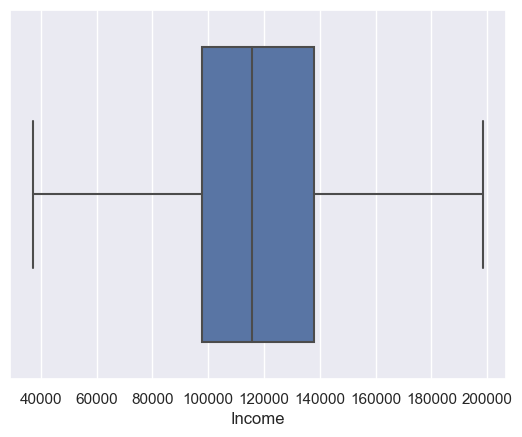

In [33]:
df_copy = df_segmentation.copy()
df = replace_outliers_with_iqr(df_copy, 'Income')
sns.boxplot(x=df['Income']);

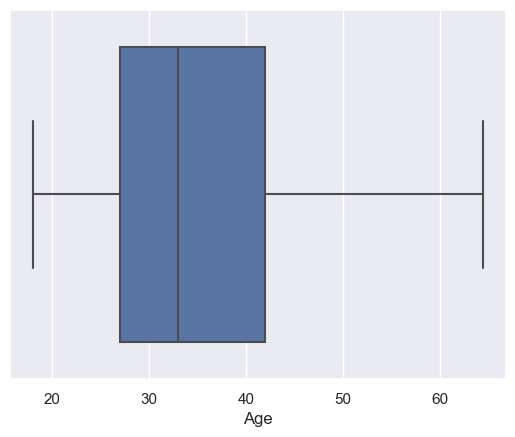

In [34]:
df = replace_outliers_with_iqr(df, 'Age')
sns.boxplot(x=df['Age']);

## ${\textbf{Correlation Estimate}}$

In [25]:
# Compute Pearson correlation coefficient for the features in our data set.
# The correlation method in pandas, it has the Pearson correlation set as default.
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


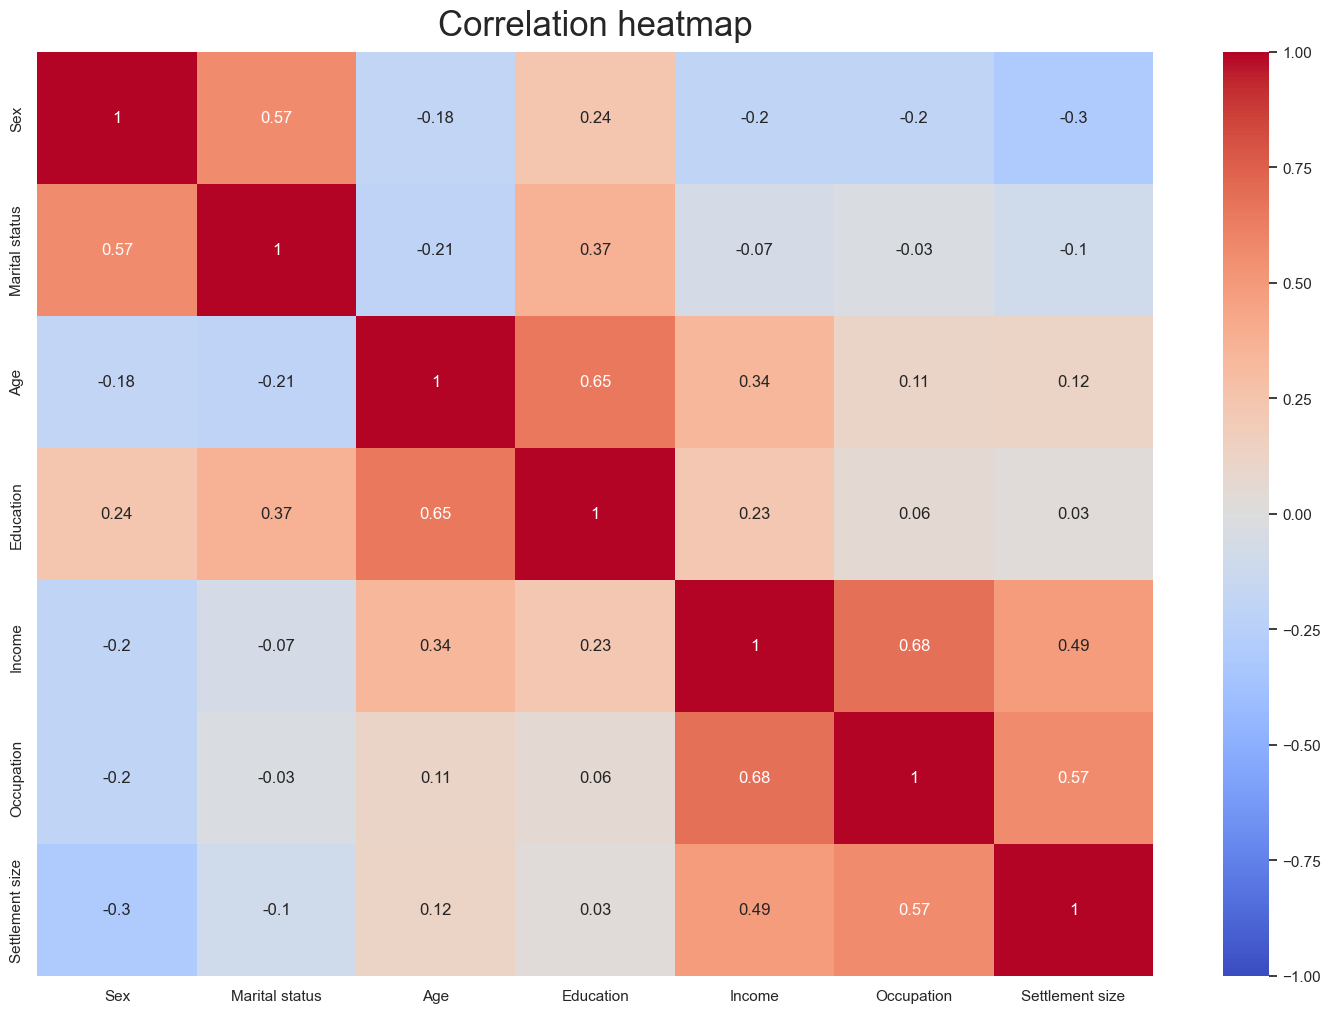

In [24]:
# We'll plot the correlations using a Heat Map. Heat Maps are a great way to visualize correlations using color coding.
# We use RdBu as a color scheme, but you can use viridis, Blues, YlGnBu or many others.
# We set the range from -1 to 1, as it is the range of the Pearson Correlation. 
# Otherwise the function infers the boundaries from the input.
# In this case they will be -0,25 to 0,68, as they are the minumum and maximum correlation indeces between our features.
plt.figure(figsize=(18, 12))
corr = df_segmentation.corr().round(2)
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True)#, mask=mask)
heatmap.set_title('Correlation heatmap', fontdict={'fontsize':25}, pad=12)
plt.show()

## ${\textbf{Visualize Raw Data}}$

Text(0.5, 1.0, 'Visualization of raw data')

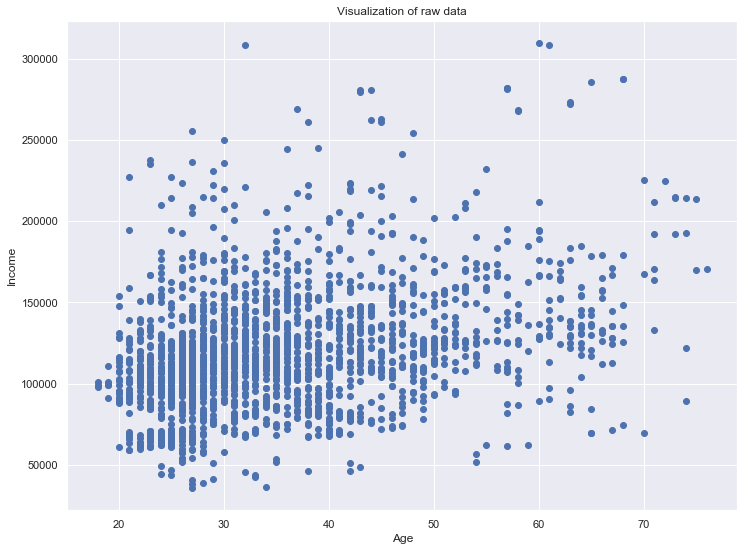

In [7]:
# We'll plot the data. We create a 12 by 9 inches figure.
# We have 2000 data points, which we'll scatter acrros Age and Income, located on positions 2 and 4 in our data set. 
plt.figure(figsize = (12, 9))
plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

## ${\textbf{Standardization}}$

In [8]:
# Standardizing data, so that all features have equal weight. This is important for modelling.
# Otherwise, in our case Income would be considered much more important than Education for Instance. 
# We do not know if this is the case, so we would not like to introduce it to our model. 
# This is what is also refered to as bias.
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

## ${\textbf{Hierarchical Clustering}}$

In [9]:
# Perform Hierarchical Clustering. The results are returned as a linkage matrix. 
hier_clust = linkage(segmentation_std, method = 'ward')

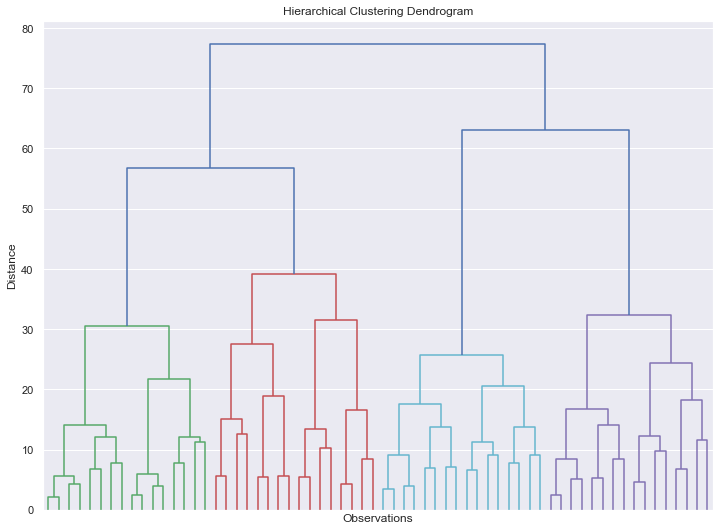

In [10]:
# We plot the results from the Hierarchical Clustering using a Dendrogram. 
# We truncate the dendrogram for better readability. The level p shows only the last p merged clusters
# We also omit showing the labels for each point.
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

## ${\textbf{K-means Clustering}}$

In [11]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
# In addition we run the algortihm at many different starting points - k means plus plus. 
# And we set a random state for reproducibility.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

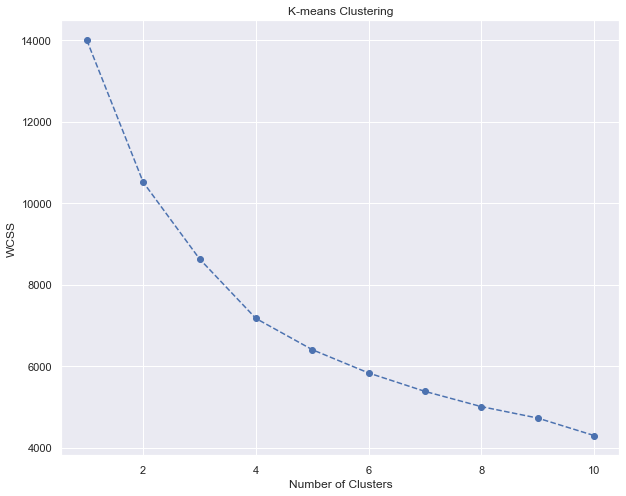

In [12]:
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters. 
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [13]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [14]:
# We divide our data into the four clusters.
kmeans.fit(segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### ${\textbf{Results}}$

In [15]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [16]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


In [17]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [18]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [19]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [20]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  3:'career focused'})

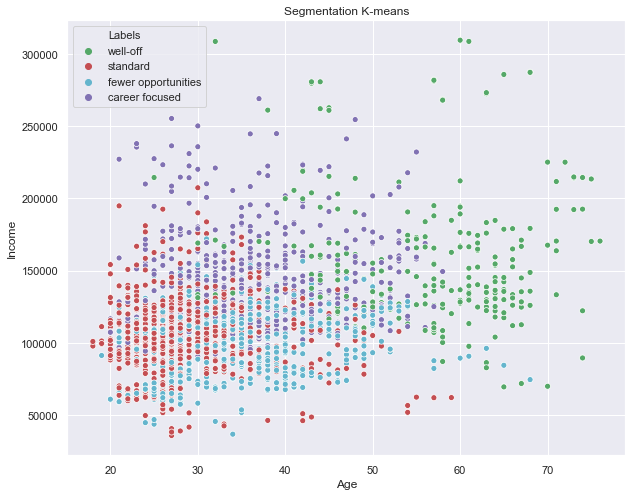

In [21]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()

### ${\textbf{PCA}}$

In [22]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

In [23]:
# Fit PCA with our standardized data.
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

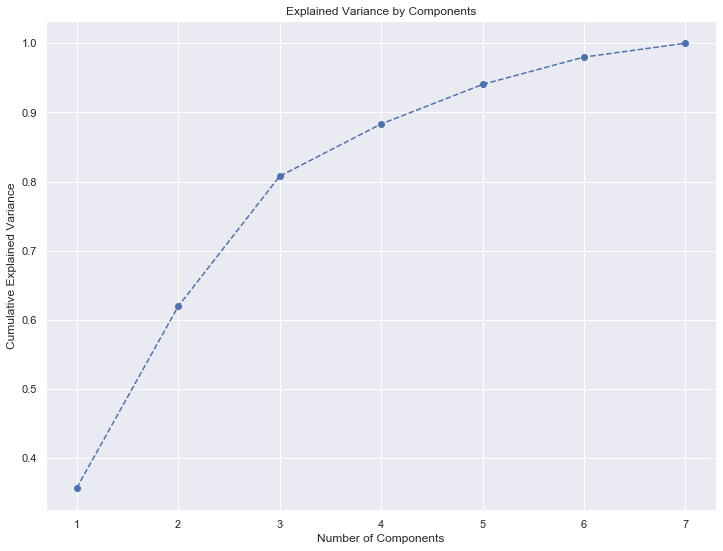

In [25]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [26]:
# We choose three components. 3 or 4 seems the right choice according to the previous graph.
pca = PCA(n_components = 3)

In [27]:
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### ${\textbf{PCA Results}}$

In [28]:
# Here we discucss the results from the PCA.
# The components attribute shows the loadings of each component on each of the seven original features.
# The loadings are the correlations between the components and the original features. 
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [29]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x16bd7981b08>,
 <a list of 3 Text yticklabel objects>)

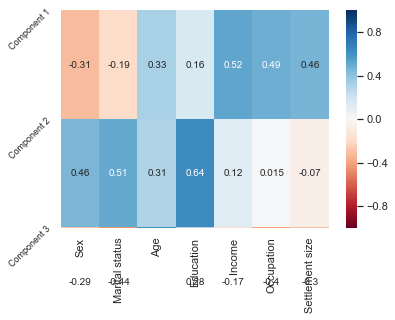

In [30]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)

In [31]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [32]:
scores_pca = pca.transform(segmentation_std)

### ${\textbf{K-means clustering with PCA}}$

In [33]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

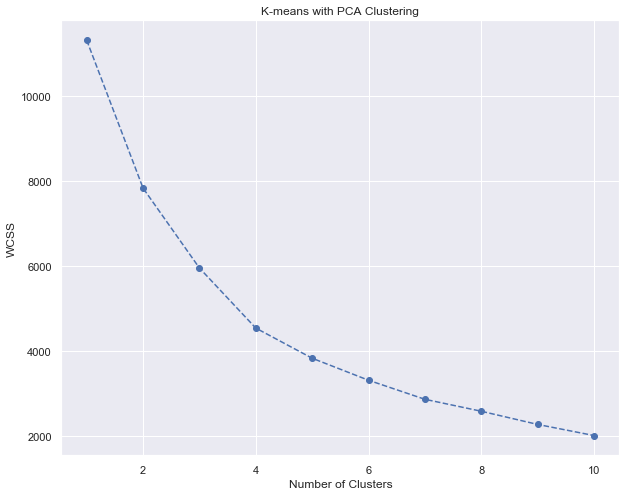

In [34]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [35]:
# We have chosen four clusters, so we run K-means with number of clusters equals four. 
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [36]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### ${\textbf{K-means clustering with PCA Results}}$

In [37]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [38]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [39]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [40]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [41]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})

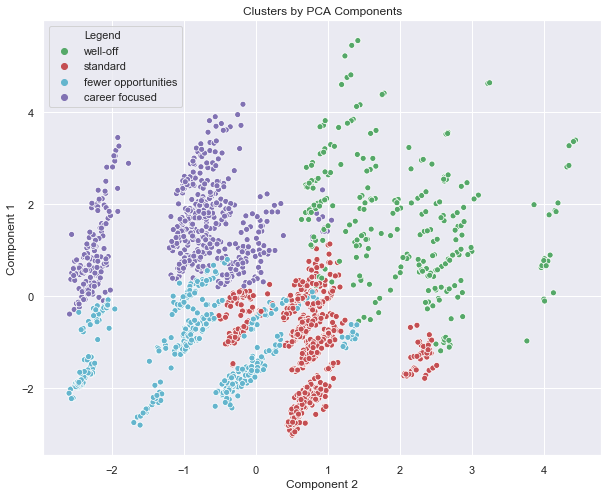

In [42]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

### ${\textbf{Data Export}}$

In [43]:
# We save the objects we'll need in the Purchase Analytics part of the course. We export them as pickle objects.
# We need the scaler, pca and kmeans_pca objects to preprocess and segment the purchase data set.
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [44]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [45]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))